In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

data = pd.read_csv("../input/fifa19/data.csv")

<p style="font-size:15px">FIFA was founded in 1904 to oversee international competition among the national associations of Belgium, Denmark, France, Germany, the Netherlands, Spain, Sweden, and Switzerland. Headquartered in Zürich, its membership now comprises 211 national associations. These national associations must each also be members of one of the six regional confederations into which the world is divided: Africa, Asia, Europe, North & Central America and the Caribbean, Oceania, and South America.<br><br>Today, FIFA outlines a number of objectives in the organizational Statues, including growing football internationally, providing efforts to ensure football is accessible to everyone, and advocating for integrity and fair play. FIFA is responsible for the organization and promotion of football's major international tournaments, notably the World Cup which commenced in 1930 and the Women's World Cup which commenced in 1991.</p>

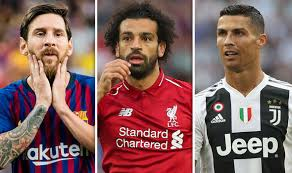

In [2]:
def height_to_inches(height):
    res = height
    try:
        lst = height.split("'")
        lst[0] = int(lst[0])
        lst[1] = int(lst[1])
        res = lst[0]*12 + lst[1]
    except:
        pass
    return res

def weight_in_int(weight):
    res = weight
    try:
        res = float(weight[:-3])
    except:
        pass
    return res

df = data.copy()
df['height_inches'] = df['Height'].apply(height_to_inches)
df['weight_int'] = df['Weight'].apply(weight_in_int)
df['bmi'] = (703 * df['weight_int']) / (df['height_inches'] ** 2)
df = df.sort_values('Potential', ascending=False).head(10)
df = df.sort_values('bmi')
print('BMI Ratio of top 10 players')
df.plot(kind='bar', x='Name', y='bmi', color='bmi')

BMI Ratio of top 10 players


# Let's clean the data first

In [3]:
#dropping columns 28-54. They may be useful for clustering but I am not sure how exactly these values can be put to use

data.drop(data.columns[28:54].tolist(), axis=1, inplace=True)

In [4]:
#cleaning height and weight

df['height'] = df['Height'].apply(height_to_inches)
df['weight'] = df['Weight'].apply(weight_in_int)

In [5]:
#cleaning value and wage

def value(value):
    if 'M' in value:
        value = float(value.replace('M',''))
        value = value*1000000
    elif 'K' in value:
        value = float(value.replace('K',''))
        value = value*1000
    return value

def wage(wage):
    wage = wage.replace('€','')
    if 'K' in wage:
        wage = float(wage.replace('K',''))
        wage = wage*1000
    return wage
        
data['Value'] = data['Value'].str.replace('€','')
data['Value'] = data['Value'].apply(value)
data['Value'] = data['Value'].astype('float')
data['Wage'] = data['Wage'].apply(wage)
data['Wage'] = data['Wage'].astype('float')

In [6]:
# cleaning body type of first three players in dataset

data['Body Type'][0] = 'Normal'
data['Body Type'][1] = 'Normal'
data['Body Type'][2] = 'Normal'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
#cleaning the release clause

def clause(clause):
    clause = str(clause).replace('€','')
    if 'M' in clause:
        clause = float(clause.replace('M',''))
        clause = clause*1000000
    elif 'K' in clause:
        clause = float(clause.replace('K',''))
        clause = clause*1000
    return clause

data['Release Clause'] = data['Release Clause'].apply(clause)
data['Release Clause'] = data['Release Clause'].astype('float')

In [8]:
#dropping features

drop_features = ['Height','Weight','Unnamed: 0','ID','Photo','Flag','Club Logo','Real Face','Joined','Loaned From','Contract Valid Until']

data.drop(drop_features, axis=1, inplace=True)

# Analysis of the data

DISTRIBUTION OF VALUES


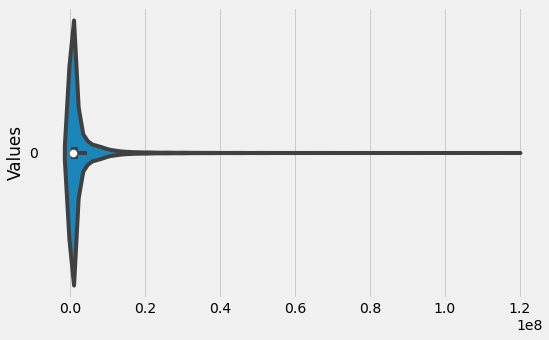

TOP 5 MOST VALUABLE PLAYERS


In [9]:
print('DISTRIBUTION OF VALUES')
sns.violinplot(data=data['Value'], orient='h')
plt.ylabel('Values')
plt.show()

print('TOP 5 MOST VALUABLE PLAYERS')
df = data.copy()
df = df.sort_values('Value').tail()
df.plot(kind='bar',x='Name',y='Value',color='Potential')

DISTRIBUTION OF WAGES


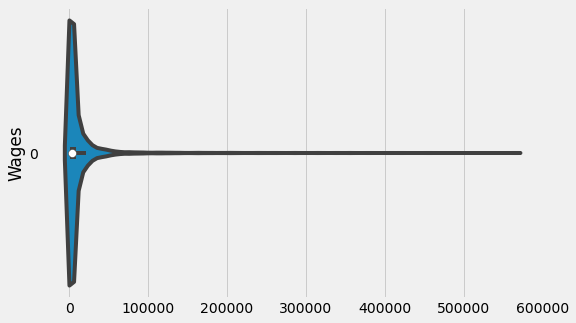

TOP 5 PLAYERS with HIGHEST WAGES


In [10]:
print('DISTRIBUTION OF WAGES')
sns.violinplot(data=data['Wage'], orient='h')
plt.ylabel('Wages')
plt.show()

print('TOP 5 PLAYERS with HIGHEST WAGES')
df = data.copy()
df = df.sort_values('Wage').tail()
df.plot(kind='bar',x='Name',y='Wage',color='Value')

AGE DISTRIBUTION OF PLAYERS


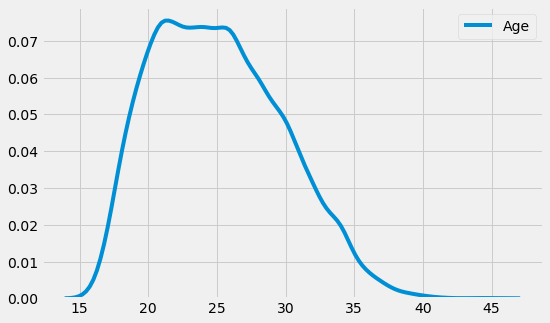

In [11]:
print('AGE DISTRIBUTION OF PLAYERS')
sns.kdeplot(data=data['Age'])
plt.show()

Most players fall in the range of 21-27 years old. But the range goes upto 45.

O. Pérez is the most aged player in the dataset with an age of 45 years.

In [12]:
df = data['Nationality'].value_counts().reset_index().head(7)
fig = px.pie(df, values='Nationality', names='index', title='Which country is most players from? -> England')
fig.show()

In [13]:
df = data[['Club','Value']].copy()
df['mean_value'] = df.groupby('Club')['Value'].transform('mean')
df.drop('Value',axis=1,inplace=True)
df = df.drop_duplicates().reset_index(drop=True).sort_values('mean_value', ascending=False).head(7)
fig = df.plot(x='Club', y='mean_value', color='mean_value', kind='bar')
fig.update_layout(title='Which club has most valued players?')

There are some correlations that I need to check and after that I will move on to the clustering. Clustering code will be added within the next 2-3 versions of the notebook.